### Fourier Transformation of Images

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from matplotlib import pyplot as plt
import cv2
import math

###### FFT is a quick DFT Algorithm 
1. [Wikipedia link](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
2. [Numpy Implementation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
3. [OpenCv](https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources)
4. [Lowpass Filtering](https://www.youtube.com/watch?v=OOu5KP3Gvx0)


In [2]:
def tffouriertransform(image):
    # Convert it into Fourier Transform
    fourier_image = tf.signal.fft2d(image)

    # DC should be shifted to Center 
    fourier_image = tf.signal.fftshift(fourier_image)
    
    return fourier_image

def tfinverse_fouriertransform(fourier_image):
    
    # DC should be shifted to Center 
    fourier_image = tf.signal.ifftshift(fourier_image)
    
    # Convert it back into Spatial Image
    spatial_image = tf.signal.ifft2d(fourier_image)
    return spatial_image

TypeError: Image data of dtype object cannot be converted to float

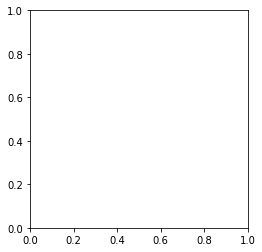

In [3]:
img = cv2.imread('Images/Paper1.png',0)
plt.imshow(img,cmap='gray')

In [ ]:
fourier_image = tffouriertransform(img)
magnitude_spectrum = 20*np.log(np.abs(fourier_image))
plt.imshow(magnitude_spectrum,cmap='gray')

In [ ]:
pool_size = 24

image_size = magnitude_spectrum.shape

filter_shape = np.sqrt(pool_size)

lowpass = np.ones(shape=image_size, dtype=np.float32)         

distance_from_corner = math.floor((image_size[0] - (image_size[0]/filter_shape)) / 2)

lowpass[:distance_from_corner,:] = 0
lowpass[-distance_from_corner: ,:] = 0

distance_from_corner = math.floor((image_size[1] - (image_size[1]/filter_shape)) / 2)

lowpass[:,:distance_from_corner] = 0
lowpass[:,-distance_from_corner:] = 0

In [ ]:
plt.imshow(lowpass,cmap="gray")

In [4]:
filtered = fourier_image * lowpass

NameError: name 'fourier_image' is not defined

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


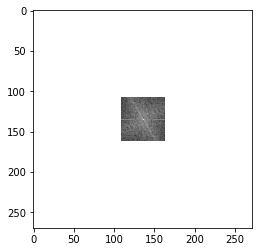

In [36]:
magnitude_spectrum = 20*np.log(np.abs(filtered))

plt.imshow(magnitude_spectrum,cmap="gray")

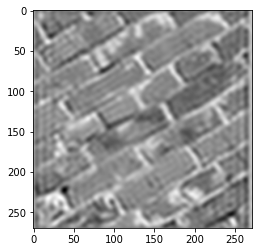

In [37]:
spatial_image = tfinverse_fouriertransform(filtered)
final_image = np.abs(spatial_image)
plt.imshow(final_image, cmap = 'gray')